In [1]:
import numpy as np
#import MDAnalysis as md
#import os
#import pylab as plb
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#from scipy import optimize
#from scipy import asarray as ar,exp
from matplotlib.ticker import FormatStrFormatter
#%matplotlib inline

In [2]:
V = np.loadtxt('1D1_60_v1_volume.xvg', skiprows=25)

In [3]:
volume = V[:,1]
density = V[:,2]
time = V[:,0]

In [4]:
D = np.loadtxt('1D1_60_v1_NC3_density.xvg', skiprows=24)

In [5]:
nt = D.shape[0]
print(nt)
half = nt/2
print(half)

50
25


In [6]:
def moving_average (a, n=5):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

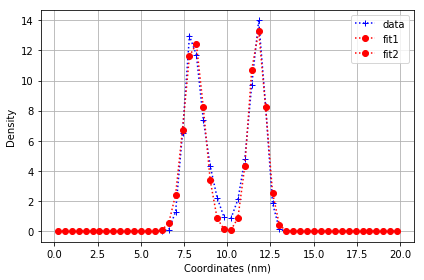

In [7]:
x1 = D[half:,0]
y1 = D[half:,1]

x2 = D[:half,0]
y2 = D[:half,1]

n1 = len(x1)                          
mean1 = sum(x1*y1)/n1                   
sigma1 = sum(y1*(x1-mean1)**2)/n1        

n2 = len(x2)                          
mean2 = sum(x2*y2)/n2                   
sigma2 = sum(y2*(x2-mean2)**2)/n2       

def func(x, a, m, s):
        return a*np.exp(-( (x-m)**2)/ s ** 2)

popt1,pcov1 = curve_fit(func,x1,y1,p0=[1,mean1,sigma1])
popt2,pcov2 = curve_fit(func,x2,y2,p0=[1,mean2,sigma2])


plt.plot(x1,y1,'b+:',label='data')
plt.plot(x2,y2,'b+:')
plt.plot(x1,func(x1,*popt1),'ro:',label='fit1')
plt.plot(x2,func(x2,*popt2),'ro:',label='fit2')
plt.legend()
plt.xlabel('Coordinates (nm)')
plt.ylabel('Density ')
plt.tight_layout()
plt.grid(True)
plt.savefig('fit.png', dpi=600)
plt.show()

In [8]:
popt1

array([13.46147732, 11.74628507, -0.68136579])

In [9]:
popt2

array([12.82013924,  8.07068476, -0.81890512])

In [10]:
height = abs(popt1[1] - popt2[1]) #in nm

In [11]:
height

3.67560030723258

In [12]:
np.mean(volume)

140.15474402559744

In [13]:
radius = np.sqrt(volume / (np.pi * height))

In [14]:
np.mean(radius)

3.483879932066586

In [15]:
no_lipids = 60

In [16]:
APL_ava = (np.mean(radius)**2 * np.pi) / no_lipids
print(APL_ava)

0.6355137926844131


In [17]:
APL = np.zeros(len(radius))
for idx, r in enumerate(radius):
    A = r**2 * np.pi
    APL[idx] = A / no_lipids

In [18]:
APL_std = np.std(APL)
radius_std = np.std(radius)
print(APL_std)
print(APL_ava)

0.0034997391181317747
0.6355137926844131


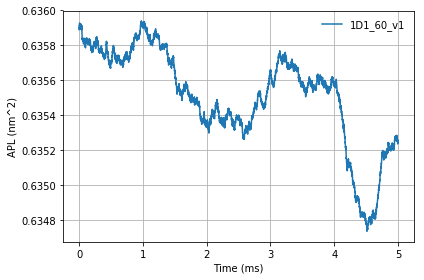

In [19]:
nn = 1000
system='1D1_60_v1'

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
#time = range(len(APL))
#ax.errorbar(moving_average(time, n=nn), moving_average(APL, n=nn), yerr=APL_std)
ax.plot(moving_average(APL, n=nn), label='{0:s}'.format(system))
xtics_raw = np.arange(0, len(moving_average(APL, n=nn)),(len(moving_average(APL, n=nn))/5))
xtics = np.arange(0, 6, 1)
ax.set_xticks(xtics_raw)
ax.set_xticklabels(xtics)
ax.grid(True)
ax.set_ylabel('APL (nm^2)')
ax.set_xlabel('Time (ms)')
plt.legend(loc='best', frameon=False)
plt.tight_layout()
plt.savefig('APL.png', dpi=600)

Text(0.5,0,'Time (ms)')

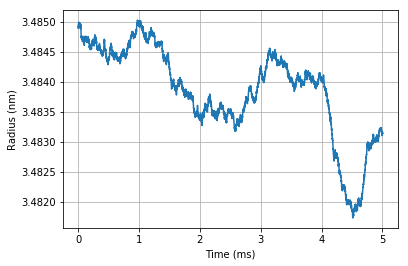

In [20]:
nn = 1000

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
ax.plot(moving_average(radius, n=nn))
xtics_raw = np.arange(0, len(moving_average(radius, n=nn)),(len(moving_average(radius, n=nn))/5))
xtics = np.arange(0, 6, 1)
ax.set_xticks(xtics_raw)
ax.set_xticklabels(xtics)
ax.grid(True)
ax.set_ylabel('Radius (nm)')
ax.set_xlabel('Time (ms)')